# Heat equation

## imports

In [14]:
import numpy as np
import pandas as pd
import scipy

In [15]:
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm_notebook

## initialization

In [16]:
problem = input("Which type of problem do you need? '1' or '2' \n")

Which type of problem do you need? '1' or '2' 
1


In [17]:
X_max = 50
Y_max = 70
X_min = Y_min = 0

NUMBER_X = 50
NUMBER_Y = 70
DELTA = 10

In [18]:
X_RANGE = np.linspace(X_min, X_max, NUMBER_X)
Y_RANGE = np.linspace(Y_min, Y_max, NUMBER_Y)

X_STEP = X_RANGE[1] - X_RANGE[0]
Y_STEP = Y_RANGE[1] - Y_RANGE[0]

In [19]:
X, Y = np.meshgrid(X_RANGE, Y_RANGE, indexing='ij')
Y_RATIO = (Y - Y_min) / (Y_max - Y_min)
X_RATIO = (X - X_min) / (X_max - X_min)

U = np.zeros_like(X)
U_coef = np.zeros_like(X)

source = np.zeros_like(X)
source_coef = np.zeros_like(X)

alpha = np.zeros_like(X_RANGE)
beta = np.zeros_like(X_RANGE)

In [20]:
source = np.exp( -1 * (
    (X - (X_max / 2)) ** 2 + 
    (Y - (Y_max / 2)) ** 2) / (DELTA ** 2))

In [21]:
def calculate_coefficients(alpha, beta, s, lam):
    a = b = 1 / (X_STEP ** 2)
    c = 2 / (X_STEP ** 2) + lam / (Y_STEP ** 2)
    d = s
    
    for i in range(1, len(s) - 1):
        alpha[i+1] = b / (c - alpha[i] * a)
        beta [i+1] = (a * beta[i] + d[i]) / (c - alpha[i] * a)

    return alpha, beta


def heatmap2d(arr: np.ndarray, interpolation=None):
    plt.imshow(arr.T, cmap='hot', interpolation=interpolation)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Temperature map')
    ax = plt.gca()
    ax.invert_yaxis()

## boundary conditions

In [22]:
if problem == '1':
    U_LOWER = 0         # lower bound
    U_UPPER = 0         # upper bound
    Q_LEFT  = 0         # left bound
    U_RIGHT = 0         # right bound

    alpha[1] = 1
    beta[1] = Q_LEFT
    U[-1, :] = U_RIGHT
    
elif problem == '2':
    U_LOWER = 0         # lower bound
    U_UPPER = 0         # upper bound
    U_LEFT  = 0         # left bound
    U_RIGHT = 0         # right bound

    U[-1, :] = U_RIGHT
    U[0, :]  = U_LEFT
    U[:, -1] = U_UPPER
    U[:, 0]  = U_LOWER
    
else:
    raise ValueError('wrong problem type')

## main procedure

In [23]:
for m in range(1, NUMBER_Y - 1):
    source_coef[:, m] = 2 / NUMBER_Y * (source * np.sin(np.pi * m * Y_RATIO)).sum(axis=1)
    
lambdas = 4 * np.square(np.sin(np.pi * Y_RATIO[0] / 2))

In [24]:
if problem == '1':
    for j in tqdm.tnrange(0, NUMBER_Y - 1):
        alpha, beta = calculate_coefficients(alpha, beta, source_coef[:, j+1], lambdas[j+1])

        for i in reversed(range(0, NUMBER_X - 1)):
            U_coef[i, j+1] = alpha[i+1] * U_coef[i+1, j+1] + beta[i+1]

elif problem == '2':
    phi = np.zeros_like(source_coef)
    v = np.zeros_like(source_coef)
    gammas = 4 * np.square(np.sin(np.pi * X_RATIO[:,0] / 2))
    
    G, L = np.meshgrid(gammas, lambdas, indexing='ij')
    
    for l in range(1, NUMBER_X - 1):
        phi[l, :] = 2 / NUMBER_X * (source_coef * np.sin(np.pi * l * X_RATIO)).sum(axis=0)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        v = phi / (G / (X_STEP ** 2) + L / (Y_STEP ** 2))
    
    for i in range(1, NUMBER_X - 1):
        U_coef[i, :] = (v * np.sin(np.pi * i * X_RATIO)).sum(axis=0)
    
else:
    raise ValueError('wrong problem type')

In [25]:
for j in range(1, NUMBER_Y - 1):
    U[:, j] = (U_coef * np.sin(np.pi * j * Y_RATIO)).sum(axis=1)

## vizualization

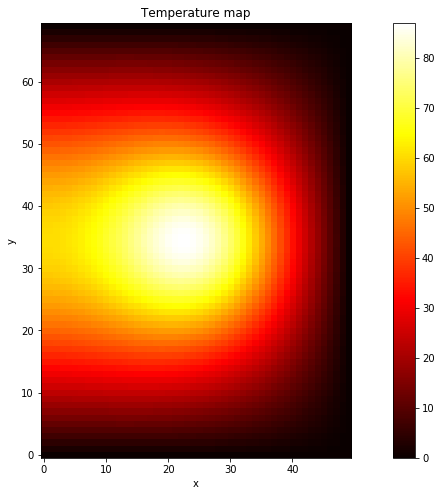

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
heatmap2d(U)

ticks = ax.get_xticks()
ax.set_xticklabels([str(int(X_min + x * (X_max - X_min) // (NUMBER_X)))
                    for x in ticks])

ticks = ax.get_yticks()
ax.set_yticklabels([str(int(Y_min + x * (Y_max - Y_min) // (NUMBER_Y)))
                    for x in ticks]);